# Исследование для Яндекс.Недвижимость - Анализ рынка недвижимости Санкт-Петербурга


**Описание проекта:**
В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
Необходимо выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.
О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

**Описание данных:** 
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

!pip install missingno
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('C:/Users/Olga/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**ВЫВОД:** В данных есть пропуски. Кроме того, необходимо будет привести данные к нужному типу и проверить на выбросы.

###  2. Предобработка данных

#### 2.1. Обработка пропусков.

Проверим данные на пропуски:

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<AxesSubplot:>

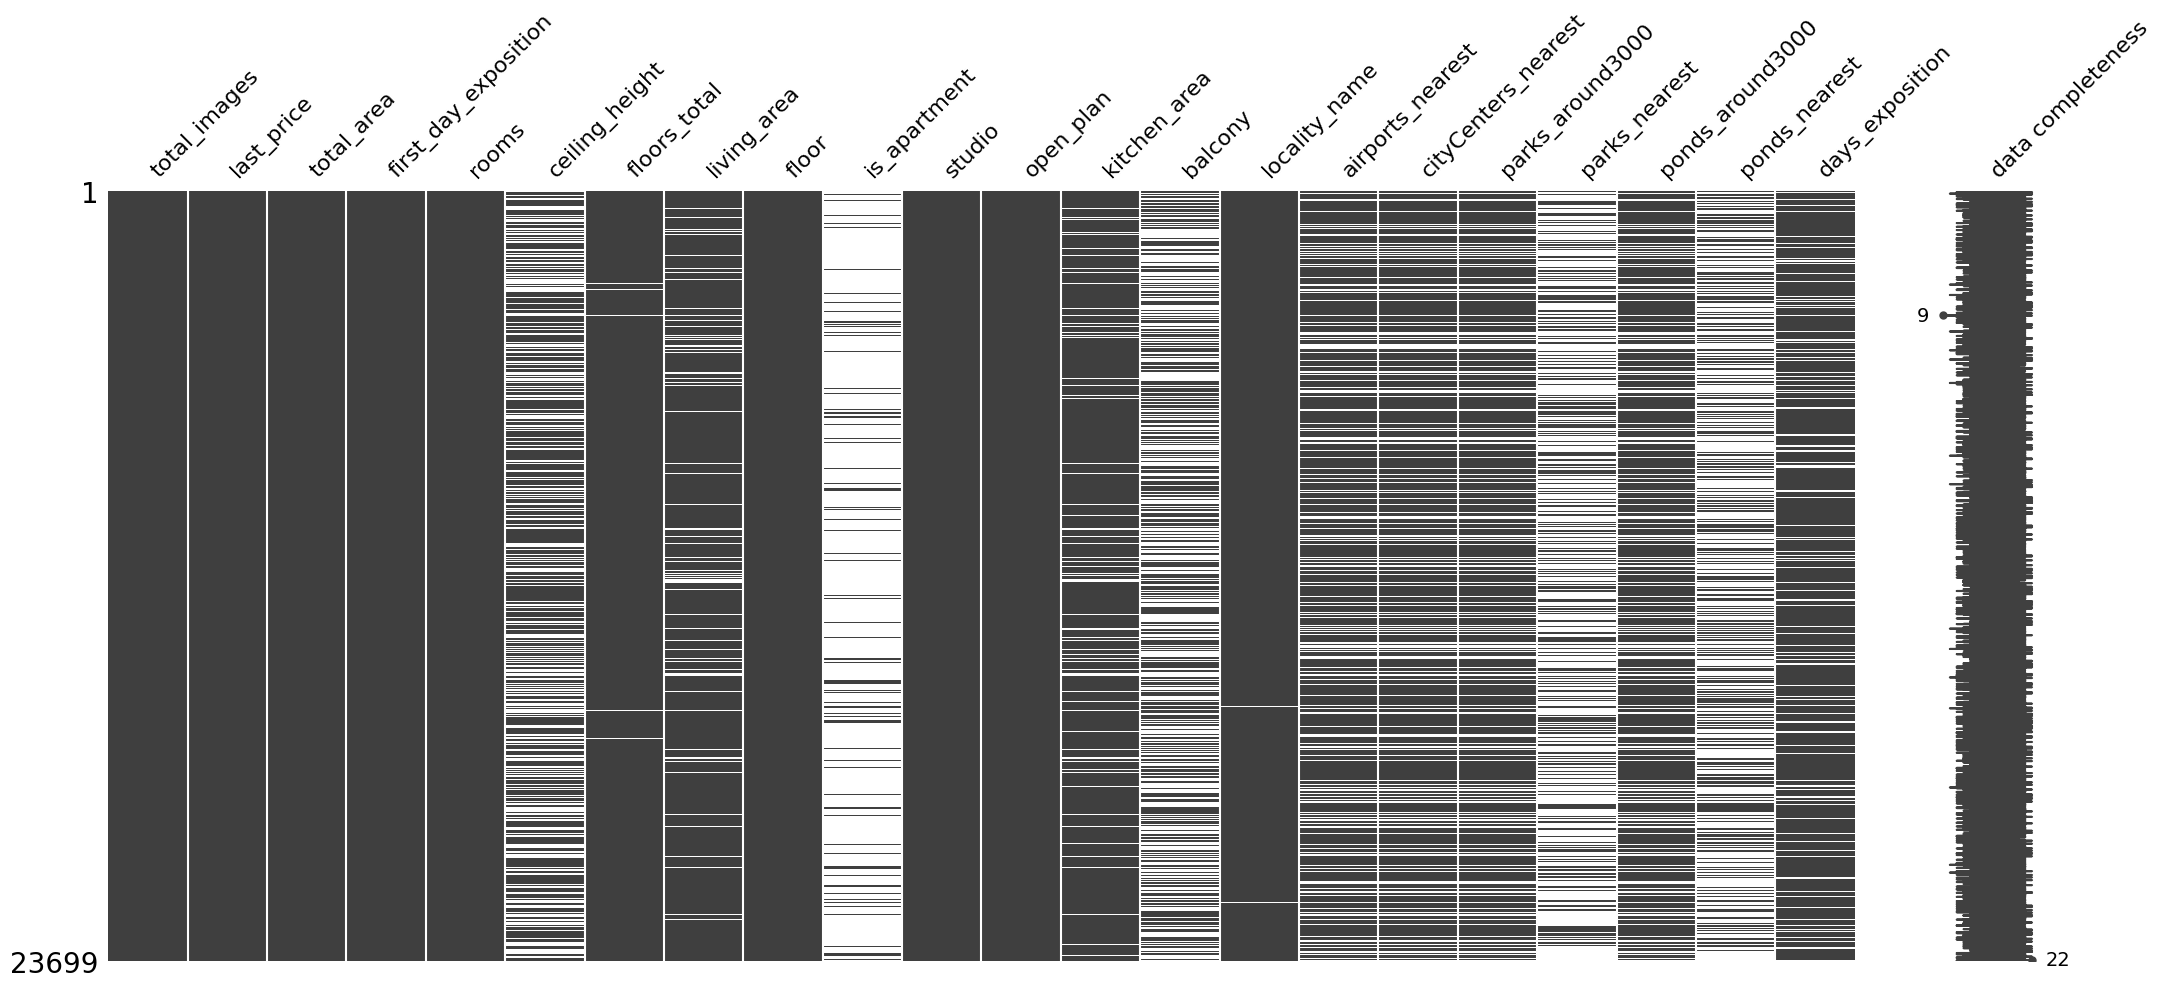

In [5]:
msno.matrix(data, labels=True)

<AxesSubplot:>

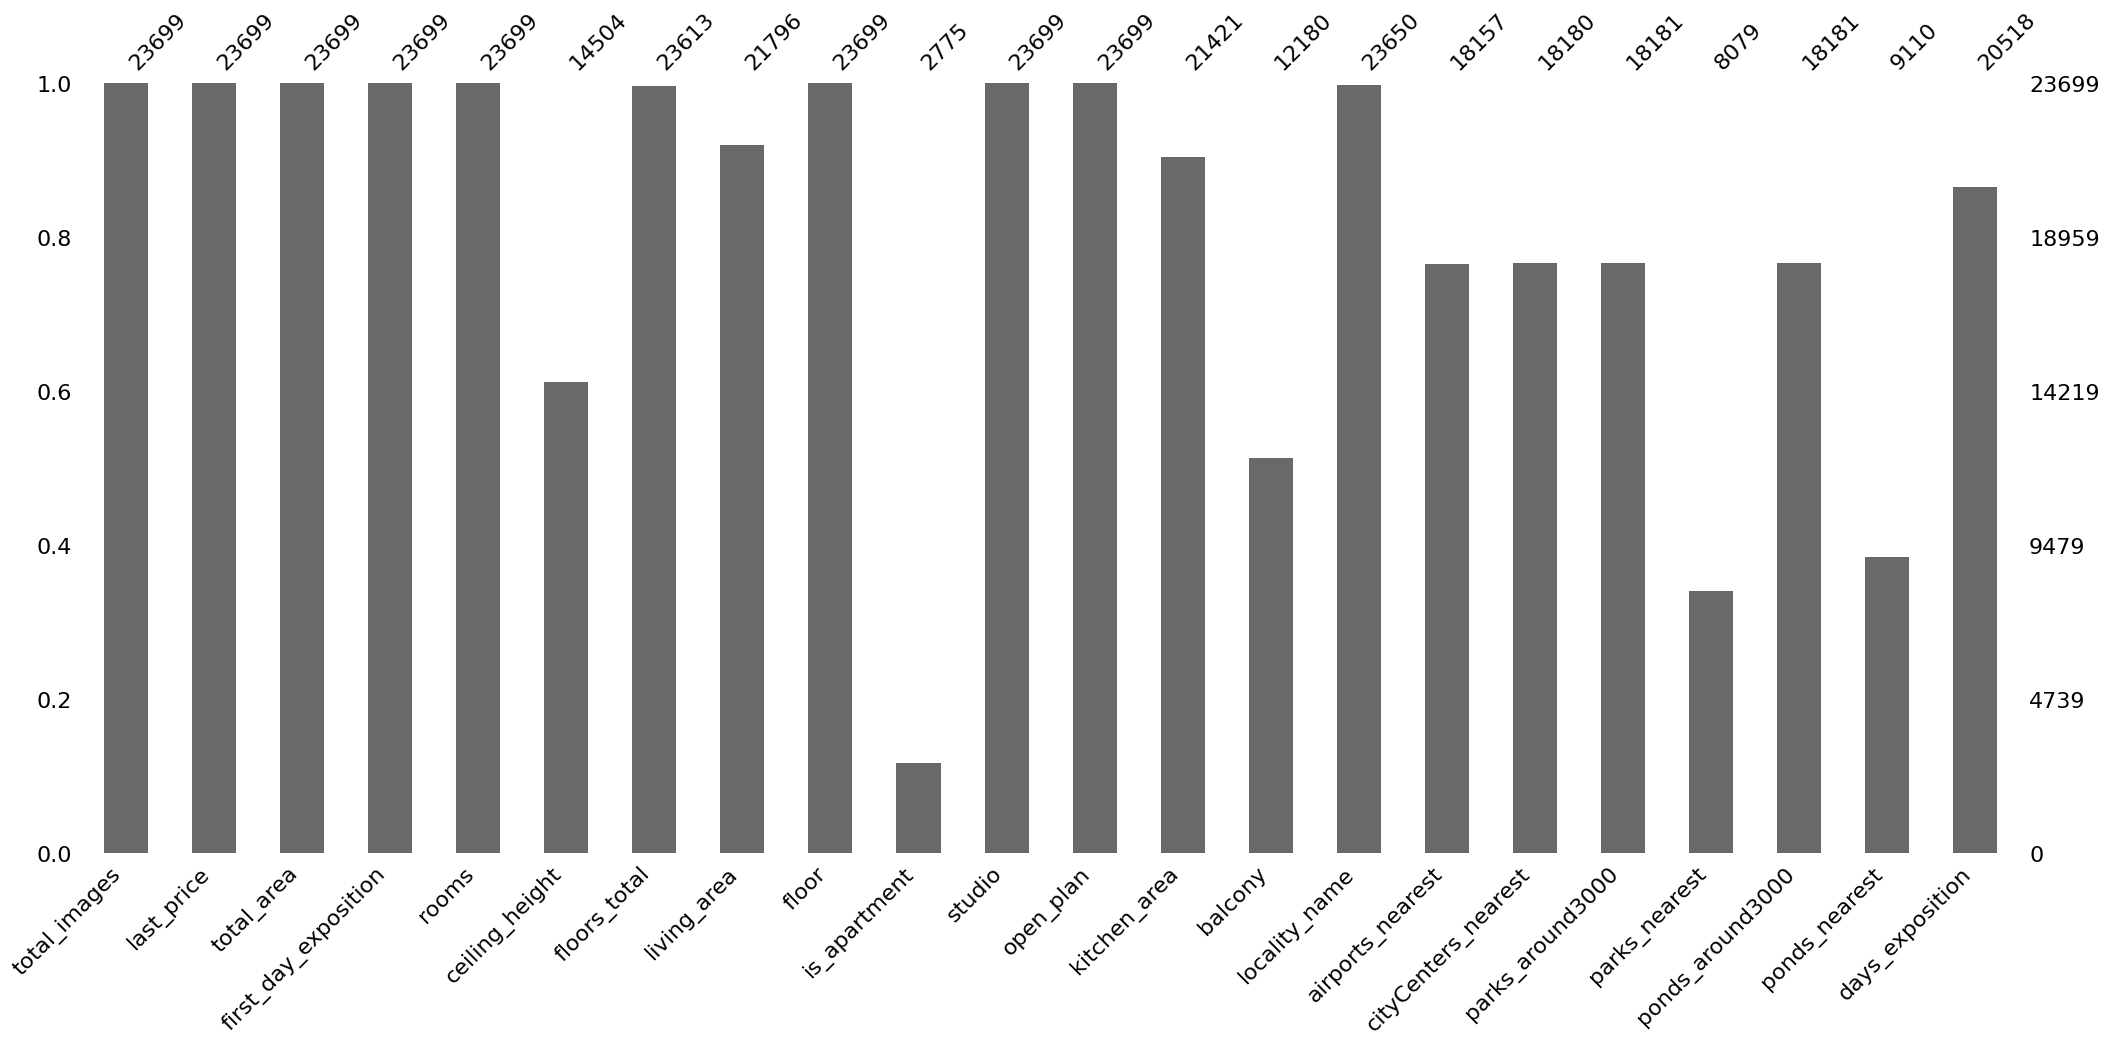

In [6]:
msno.bar(data)

Пропущенные значения есть практически во всех столбцах.

###### Для обработки пропущенных значений применим следующий план:

- пропуски в столбце **balcony** заменим нулями, исходя из гипотезы, что если количество балконов не указано, значит их просто нет;

- пропуски в столбце **is_apartment** заменим на 0, исходя из гипотезы, что если ничего не указано, значит данный объект не является апартаментами;

- пропуски в столбце **days_exposition** заменим нулями, исходя из предположения, что если данных нет, то объявление либо было снято продавцом в тот же день, либо не прошло проверку и было автоматически снято;

- в столбцах **locality_name, floors_total** пропущенных значений меньше 0.5%, поэтому строки с такими пропусками просто отбросим;

- пропуски в столбцах **cityCenters_nearest, airports_nearest** заполним медианными значениями, в зависимости от населенного пункта;

- пропущенные значения в столбцах с метрическими данными обектов **ceiling_height, living_area, kitchen_area** заменим медианными значениями, предварительно сгруппировав объекты по какому-то логическому признаку (например, удаленность от центра);

- пропущенные значения в столбцах **parks_around3000, parks_nearest, ponds_around3000, ponds_nearest** логично было бы оставить незаполненными, т.к. совершенно невозможно предположить, есть ли там парки и пруды вообще. Однако, в этих столбцах очень много пропусков - более 50%, и оставив эти пропуски, мы рискуем получить искажение результатов исследования. Поэтому, заполним пропуски в этих столбцах медианными значениями, исходя из локации объекта.


In [7]:
# Заполняем нулями пропуски в столбцах: balcony, is_apartment, days_exposition

data['balcony'] = data['balcony'].fillna(0)
data['is_apartment'] = data['is_apartment'].fillna(0)
data['days_exposition'] = data['days_exposition'].fillna(0)

In [8]:
# Удаляем строки, где в столбцах locality_name и floors_total есть пропущенные значения

data = data.dropna(subset=['locality_name', 'floors_total'])

Пропуски в столбце **cityCenters_nearest** заполним медианными значениями в зависимости от населенного пункта.
Для начала посмотрим на все уникальные значения населенных пунктов:

In [9]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Поскольку в данных слишком много разных населенных пунктов, логично будет разделить их на группы: СПб и область.

Заменим пропуски **cityCenters_nearest** медианными значениями согласно условной градации Город-Область. Значения = Санкт-Петербург примем за город, а всё остальное будет областью.

In [10]:
# Создаем новый столбец, куда будет вписана категория (город или область), и по умолчанию заполняем его значением "Область"
data['group'] = 'Область'

# Для строк, где в locality_name значится "Санкт-Петербург", меняем категорию с "Область" на "Город"
data.loc[data['locality_name'] == "Санкт-Петербург", 'group'] = 'Город'

In [11]:
# Для последующей проверки находим медианные значения cityCenters_nearest и airports_nearest для обеих категорий

medians = data.groupby(['group'])[['cityCenters_nearest', 'airports_nearest']].agg('median').reset_index()
medians

,group,cityCenters_nearest,airports_nearest
0,Город,12242.0,26763.0
1,Область,30375.0,26725.5


In [12]:
# Заполняем пропуски в столбцах cityCenters_nearest и airports_nearest:

for t in data['group'].unique():
    data.loc[(data['group'] == t) & (data['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = \
    data.loc[(data['group'] == t), 'cityCenters_nearest'].median()
    data.loc[(data['group'] == t) & (data['airports_nearest'].isna()), 'airports_nearest'] = \
    data.loc[(data['group'] == t), 'airports_nearest'].median()

Пропущенные значения в столбцах с метрическими данными **ceiling_height, living_area, kitchen_area, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest** заменим медианными значениями, предварительно сгруппировав объекты по удаленности от центра. Для этого введем столбец **location**, в котором разделим все объекты по группам Центр-Окраина-Область. Такая более детальная группировка необходима в связи с тем, что в СПб квартиры в центре и в спальных районах могут существенно отличаться по характеристикам. Например, высота потолка в старом жилом фонде в центре города в большинстве случаев будет более 3х метров, тогда как на окраине это скорее всего около 2.5м.

In [13]:
# Выведем данные о количестве объектов в городе и области - они потребуются нам для проверки корректности разделения 
# в новой группировке.

data.groupby('group')['group'].count()

group
Город      15651
Область     7914
Name: group, dtype: int64

In [14]:
# Для определения критериев разделения посмотрим на статистику значений в столбце cityCenters_nearest:

data['cityCenters_nearest'].describe()

count    23565.000000
mean     17924.083768
std      10169.658056
min        181.000000
25%      10935.000000
50%      14958.000000
75%      30375.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [15]:
# Для разделения по новым группам создадим функцию location и запишем результаты ее работы в одноименный столбец:

def location(cityCenters_nearest):
    if cityCenters_nearest <= 8000:
        return 'Центр'
    if 8000 < cityCenters_nearest <= 20000:
        return 'Окраина'
    if cityCenters_nearest > 20000:
        return 'Область'
    
    
data['location'] = data['cityCenters_nearest'].apply(location)

In [16]:
# Проверим соотношение объектов в городе и области в новой группировке:

data.groupby('location')['location'].count()

location
Область     8053
Окраина    11807
Центр       3705
Name: location, dtype: int64

Итак, ранее мы группировали объекты по группам Город/Область, и получали соотношение 15651 и 7914 объектов соответственно. По итогам новой группировки получилось, что в Городе суммарно 15512, а в группе Область - 8053. Цифры сопоставимы, следовательно критерии для новой категоризации подобраны верно, и можно заполнять пропуски в соответствии с этими новыми категориями.

In [17]:
# Создадим проверочную таблицу с медианными значениями для каждой категории в столбце location:

med = data.groupby(['location'])[['ceiling_height', 'living_area', 'kitchen_area', \
                                 'parks_around3000', 'parks_nearest', 'ponds_around3000', \
                                 'ponds_nearest']].agg('median').reset_index()
med

,location,ceiling_height,living_area,kitchen_area,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
0,Область,2.6,28.3,8.8,0.0,367.0,1.0,492.0
1,Окраина,2.6,29.8,9.0,0.0,474.0,0.0,540.0
2,Центр,3.0,45.0,12.0,1.0,433.5,1.0,450.0


In [18]:
# Заполним пропущенные значения с помощью цикла

column_list = ['ceiling_height', 'living_area', 'kitchen_area', 'parks_around3000', \
               'parks_nearest', 'ponds_around3000', 'ponds_nearest']
for t in data['location'].unique():
    for column in column_list:
        data.loc[(data['location'] == t) & (data[column].isna()), column] = \
        data.loc[(data['location'] == t), column].median()

In [19]:
# Проверим правильность работы цикла, сравнив подставленные значения с проверочными из таблицы med 
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,group,location
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,0,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0,Город,Окраина
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.60,11.0,18.60,1,0,...,посёлок Шушары,12817.0,18603.0,0.0,474.0,0.0,540.0,81.0,Область,Окраина
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.60,5.0,34.30,4,0,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Город,Окраина
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,3.00,14.0,45.00,9,0,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Город,Центр
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,0,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Город,Окраина
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.60,12.0,14.40,5,0,...,городской посёлок Янино-1,26725.5,30375.0,0.0,367.0,1.0,492.0,55.0,Область,Область
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.60,26.0,10.60,6,0,...,посёлок Парголово,52996.0,19143.0,0.0,474.0,0.0,540.0,155.0,Область,Окраина
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.60,24.0,29.80,22,0,...,Санкт-Петербург,23982.0,11634.0,0.0,474.0,0.0,540.0,0.0,Город,Окраина
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.60,27.0,15.43,26,0,...,посёлок Мурино,26725.5,30375.0,0.0,367.0,1.0,492.0,189.0,Область,Область
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,0,...,Санкт-Петербург,50898.0,15008.0,0.0,474.0,0.0,540.0,289.0,Город,Окраина


Замена произведена корректно.

In [20]:
# Проверим, остались ли в данных пропуски

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

#### 2.2. Приведение данных к нужным типам.

In [21]:
# Приведем данные в столбцах к целочисленному типу

col_list = [['is_apartment', 'balcony', 'days_exposition', 'studio', 'open_plan']]

for col in col_list:
    data[col] = data[col].astype('int')

In [22]:
# Перевод типа из строки в дату и время:

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
data.info()                                             

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  int32         
 10  studio                23565 non-null  int32         
 11  open_plan             23565 non-null  int32         
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

#### 2.3. Устранение неявных дубликатов.

Изучим список значений в столбце с названиями населенных пунктов - **locality_name**

In [23]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [24]:
# Выведем первые 60 самых часто встречающихся значений в столбце locality_name.

data['locality_name'].value_counts().head(60)

Санкт-Петербург                            15651
посёлок Мурино                               520
посёлок Шушары                               439
Всеволожск                                   398
Пушкин                                       369
Колпино                                      338
посёлок Парголово                            327
Гатчина                                      307
деревня Кудрово                              299
Выборг                                       237
Петергоф                                     201
Сестрорецк                                   183
Красное Село                                 176
Кудрово                                      171
деревня Новое Девяткино                      143
Сертолово                                    142
Ломоносов                                    133
Кириши                                       125
Сланцы                                       112
Волхов                                       111
Тосно               

 Достаточно почистить от неявных дубликатов значения в ТОП-50, поскольку далее процент упоминаний населенных пунктов совсем мал, и даже если там есть неявные дубликаты, они не повлияют существенно на исследование.

In [25]:
# Напишем цикл для приведения неявных дублей к единому значению

def pure_locality_name(row):
    if 'Мурино' in row:
        return 'Мурино'
    elif 'Шушары' in row:
        return 'Шушары'
    elif 'Парголово' in row:
        return 'Парголово'
    elif 'Кудрово' in row:
        return 'Кудрово'
    elif 'Бугры' in row:
        return 'Бугры'
    elif 'Тельмана' in row:
        return 'посёлок Тельмана'
    elif 'Рябово' in row:
        return 'Рябово'
    else:
        return row

In [26]:
# Создадим столбец, куда запишем результаты работы функции

data['pure_locality_name'] = data['locality_name'].apply(pure_locality_name)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,group,location,pure_locality_name
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,0,...,18863.0,16028.0,1.0,482.0,2.0,755.0,0,Город,Окраина,Санкт-Петербург
1,7,3350000.0,40.4,2018-12-04,1,2.60,11.0,18.6,1,0,...,12817.0,18603.0,0.0,474.0,0.0,540.0,81,Область,Окраина,Шушары
2,10,5196000.0,56.0,2015-08-20,2,2.60,5.0,34.3,4,0,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558,Город,Окраина,Санкт-Петербург
3,0,64900000.0,159.0,2015-07-24,3,3.00,14.0,45.0,9,0,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424,Город,Центр,Санкт-Петербург
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,0,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121,Город,Окраина,Санкт-Петербург


In [27]:
# Проверим, есть ли неявные дубликаты в первой 30-ке значений населенных пунктов

data['pure_locality_name'].value_counts().head(30)

Санкт-Петербург            15651
Мурино                       586
Кудрово                      470
Шушары                       439
Всеволожск                   398
Пушкин                       369
Колпино                      338
Парголово                    327
Гатчина                      307
Выборг                       237
Петергоф                     201
Сестрорецк                   183
Красное Село                 176
деревня Новое Девяткино      143
Сертолово                    142
Ломоносов                    133
Кириши                       125
Бугры                        113
Сланцы                       112
Волхов                       111
Кингисепп                    104
Тосно                        104
Кронштадт                     96
Никольское                    93
Коммунар                      89
Сосновый Бор                  87
Кировск                       84
Отрадное                      80
Приозерск                     66
посёлок Металлострой          66
Name: pure

#### 2.4. Работа с выбросами.

Данные необходимо проверить на наличие выбросов. Для этого посмотрим на разброс значений и статистические параметры в столбцах с метрическими данными.

In [28]:
# Создадим список столбцов, в которых предположительно могут быть выбросы.

columns_list = ['total_area', 'rooms', 'ceiling_height', 'floors_total', 'living_area',\
                'kitchen_area', 'airports_nearest', 'cityCenters_nearest', 'last_price']


# Напишем цикл для вывода инфрмации о значениях в столбцах из списка

for col in columns_list:
    print('Сортировка значений для столбца', col)
    print()
    print(data[col].value_counts(ascending=False))
    print()
    print(data[col].describe().round())
    print()
    print('#####################################')
    print()

Сортировка значений для столбца total_area

45.00     419
42.00     383
31.00     346
60.00     346
44.00     343
         ... 
37.92       1
115.60      1
117.40      1
62.34       1
55.06       1
Name: total_area, Length: 2159, dtype: int64

count    23565.0
mean        60.0
std         36.0
min         12.0
25%         40.0
50%         52.0
75%         70.0
max        900.0
Name: total_area, dtype: float64

#####################################

Сортировка значений для столбца rooms

1     8004
2     7897
3     5779
4     1172
5      325
0      194
6      104
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

count    23565.0
mean         2.0
std          1.0
min          0.0
25%          1.0
50%          2.0
75%          3.0
max         19.0
Name: rooms, dtype: float64

#####################################

Сортировка значений для столбца ceiling_height

2.60     9431
2.50     3515
3.00     2406


Вот что кажется подозрительным при осмотре значений в первом приближении:
1. В столбце **total_area** есть вариант квартиры с площадью 900м2 - далее посмотрим на него поближе.
2. В столбце **ceiling_height** есть явно ошибочные значения - 27.5, 32 и даже 100м. Для высоты потолка это очень много). Скорее всего, на самом деле это вещественные значения 2.7, 3.2м и т.д, в которых просто не поставили точку. Такие данные можно исправить.
3. В столбцы **floors_total** странными кажутся здания выше 45-ти этажей. По данным из открытых источников, в Петербурге не должно быть настолько высоких зданий. Имеет смысл посмотреть на такие объявления поближе, прежде чем решить, выбросы ли это и можно ли их удалять.
4. В столбце **last_price** есть явные выбросы, например кватрира стоимостью 763 млн руб. Такие значения однозначно стоит вычистить, так как они могут существенно исказить результаты анализа.
5. В столбце **living_area** есть значений 2м, необходимо проверить.
6. В столбце **kitchen_area** есть аномально большие и аномально маленькие кухни.

In [29]:
# Посмотрим на квартиры с площадью от 400м2

data.query('total_area > 600')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,group,location,pure_locality_name
3117,19,140000000.0,631.0,2019-03-30,7,3.0,5.0,45.0,5,0,...,25707.0,4972.0,0.0,433.5,2.0,210.0,0,Город,Центр,Санкт-Петербург
12859,20,140000000.0,631.2,2019-04-09,7,3.9,4.0,322.3,4,0,...,25707.0,4972.0,0.0,433.5,2.0,210.0,0,Город,Центр,Санкт-Петербург
15651,20,300000000.0,618.0,2017-12-18,7,3.4,7.0,258.0,5,0,...,32440.0,5297.0,0.0,433.5,2.0,198.0,111,Город,Центр,Санкт-Петербург
19540,8,420000000.0,900.0,2017-12-06,12,2.8,25.0,409.7,25,0,...,30706.0,7877.0,0.0,433.5,2.0,318.0,106,Город,Центр,Санкт-Петербург


Практически все квартиры с большой площадью расположены в центре. Это вполне логично, так как в Петербурге довольно много выкупленных старых коммунальных квартир, и скорее всего именно из них получаются варианты площадью 400м2 и более. Также есть большие квартиры в новых элитных ЖК (вариант-чемпион с площадью 900м2 скорее всего именно из таких, потому что расположен в 25-тиэтажном здании).

Все эти объявления скорее всего не фэйковые, однако, они сильно выбиваются из общей картины данных. Учитывая, что доля таких больших квартир ничтожно мала, и их можно безболезненно удалить. 

In [30]:
# Посмотрим на квартиры с потолками выше 10м

data.query('ceiling_height > 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,group,location,pure_locality_name
355,17,3600000.0,55.2,2018-07-12,2,25.0,5.0,32.0,2,0,...,26725.5,30375.0,0.0,367.0,1.0,492.0,259,Область,Область,Гатчина
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3.0,53.0,2,0,...,26725.5,30375.0,0.0,367.0,1.0,492.0,0,Область,Область,Волхов
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9.0,30.0,2,0,...,12016.0,13256.0,1.0,658.0,1.0,331.0,181,Город,Окраина,Санкт-Петербург
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25.0,17.0,17,0,...,26725.5,30375.0,0.0,367.0,1.0,492.0,28,Область,Область,Мурино
5076,0,3850000.0,30.5,2018-10-03,1,24.0,5.0,19.5,1,1,...,29686.0,8389.0,3.0,397.0,1.0,578.0,7,Город,Окраина,Санкт-Петербург
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5.0,30.0,3,0,...,26725.5,30375.0,0.0,367.0,1.0,492.0,540,Область,Область,деревня Мины
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9.0,21.3,3,0,...,28981.0,10912.0,1.0,305.0,0.0,540.0,267,Город,Окраина,Санкт-Петербург
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36.0,41.0,13,0,...,18732.0,20444.0,0.0,367.0,3.0,80.0,38,Город,Область,Санкт-Петербург
6246,6,3300000.0,44.4,2019-03-25,2,25.0,5.0,31.3,5,0,...,68923.0,50649.0,1.0,417.0,2.0,73.0,0,Область,Область,Кронштадт
9379,5,3950000.0,42.0,2017-03-26,3,25.0,5.0,30.0,2,0,...,11647.0,13581.0,0.0,474.0,0.0,540.0,0,Город,Окраина,Санкт-Петербург


In [31]:
# В столбце ceiling_height заменим ошибочные значения

def ceiling_height_correct(ceiling_height):
    if ceiling_height >= 20:
        return (ceiling_height/10)
    else:
        return ceiling_height

In [32]:
data['ceiling_height'] = data['ceiling_height'].apply(ceiling_height_correct)
data['ceiling_height'].sort_values(ascending=False)

15061    14.00
22309    10.30
22869    10.00
5863      8.30
3474      8.00
         ...  
5850      2.00
19098     2.00
16934     1.75
5712      1.20
22590     1.00
Name: ceiling_height, Length: 23565, dtype: float64

In [33]:
# Посмотрим на квартиры с подозрительно низкими потолками

data.query('ceiling_height < 2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,group,location,pure_locality_name
5712,5,1500000.0,42.8,2017-08-14,2,1.20,2.0,27.5,1,0,...,26725.5,30375.0,0.0,367.0,1.0,492.0,248,Область,Область,городской посёлок Мга
16934,5,4100000.0,40.0,2017-10-17,1,1.75,37.0,17.4,5,0,...,18732.0,20444.0,0.0,367.0,3.0,80.0,71,Город,Область,Санкт-Петербург
22590,16,6000000.0,55.0,2018-10-31,2,1.00,12.0,32.4,7,0,...,33053.0,14217.0,2.0,293.0,2.0,289.0,13,Город,Окраина,Санкт-Петербург


In [34]:
# Проверим квартиры в зданиях с подозрительновысокой этажностью

data.query('floors_total >= 40')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,group,location,pure_locality_name
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60.0,27.4,4,0,...,67763.0,49488.0,2.0,342.0,3.0,614.0,166,Область,Область,Кронштадт
16731,9,3978000.0,40.0,2018-09-24,1,2.65,52.0,10.5,18,0,...,20728.0,12978.0,1.0,793.0,0.0,540.0,45,Город,Окраина,Санкт-Петербург


In [35]:
# Проверим нетипично дорогие квартиры

data.query('last_price > 100000000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,group,location,pure_locality_name
793,20,135000000.0,310.0,2018-05-22,4,3.30,5.0,250.00,2,0,...,34159.0,7251.0,2.0,295.0,3.0,190.0,342,Город,Центр,Санкт-Петербург
1026,20,155000000.0,310.0,2018-10-12,5,5.30,3.0,190.00,3,0,...,24899.0,4785.0,0.0,433.5,1.0,603.0,0,Город,Центр,Санкт-Петербург
1188,20,118000000.0,290.6,2018-06-01,6,3.82,6.0,188.70,3,0,...,25309.0,6224.0,1.0,217.0,0.0,450.0,316,Город,Центр,Санкт-Петербург
1300,14,120000000.0,280.0,2018-07-12,5,4.70,4.0,162.00,3,0,...,24680.0,4247.0,1.0,464.0,3.0,339.0,225,Город,Центр,Санкт-Петербург
1436,19,330000000.0,190.0,2018-04-04,3,3.50,7.0,95.00,5,0,...,23011.0,1197.0,3.0,519.0,3.0,285.0,233,Город,Центр,Санкт-Петербург
1928,11,125000000.0,224.5,2017-01-24,4,3.00,4.0,163.50,3,0,...,22805.0,2335.0,0.0,433.5,2.0,497.0,174,Город,Центр,Санкт-Петербург
2243,9,130278280.0,304.0,2015-07-24,5,3.11,9.0,45.00,7,0,...,25593.0,5913.0,2.0,164.0,0.0,450.0,599,Город,Центр,Санкт-Петербург
2536,16,159984000.0,242.4,2015-08-27,4,3.85,9.0,131.00,7,0,...,21946.0,2242.0,1.0,679.0,1.0,227.0,501,Город,Центр,Санкт-Петербург
3117,19,140000000.0,631.0,2019-03-30,7,3.00,5.0,45.00,5,0,...,25707.0,4972.0,0.0,433.5,2.0,210.0,0,Город,Центр,Санкт-Петербург
4996,20,124000000.0,124.5,2017-10-12,4,3.00,4.0,67.20,2,0,...,20399.0,1722.0,3.0,302.0,3.0,172.0,45,Город,Центр,Санкт-Петербург


In [36]:
# Проверим жилую площадь менее 8м2

data.query('living_area < 8')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,group,location,pure_locality_name
3242,7,4440000.0,41.0,2017-07-02,1,2.6,17.0,3.0,17,0,...,19272.0,13073.0,0.0,474.0,0.0,540.0,216,Город,Окраина,Санкт-Петербург
13915,20,6350000.0,52.0,2018-02-06,2,3.0,6.0,2.0,2,0,...,32453.0,6521.0,0.0,433.5,1.0,1012.0,91,Город,Центр,Санкт-Петербург
16431,13,3799000.0,31.0,2018-04-12,1,2.6,5.0,6.0,1,0,...,32177.0,4826.0,1.0,430.0,0.0,450.0,168,Город,Центр,Санкт-Петербург
17582,11,2680000.0,22.0,2018-08-11,0,2.6,25.0,5.0,8,0,...,22735.0,11618.0,1.0,835.0,1.0,652.0,70,Город,Окраина,Санкт-Петербург
19251,19,4050000.0,33.0,2018-10-15,1,2.5,22.0,6.5,21,0,...,9258.0,10592.0,1.0,458.0,0.0,540.0,44,Город,Окраина,Санкт-Петербург
21758,0,2330000.0,23.0,2018-01-01,0,2.6,24.0,2.0,22,0,...,26725.5,30375.0,0.0,367.0,1.0,492.0,66,Область,Область,Мурино
21943,15,6100000.0,77.6,2019-02-28,4,2.5,9.0,5.4,1,0,...,29338.0,11270.0,1.0,584.0,0.0,540.0,33,Город,Окраина,Санкт-Петербург
23574,14,64990000.0,139.0,2015-11-24,3,3.0,8.0,3.0,8,0,...,33255.0,5975.0,1.0,630.0,3.0,100.0,280,Город,Центр,Санкт-Петербург


Федеральный стандарт социальной нормы площади жилья составляет 18 кв. метров общей площади жилья на одного члена семьи, состоящей из трех и более человек, 42 кв. метра - на семью из двух человек, 33 кв. метра - на одиноко проживающих граждан. Для жилой площади нормы не прописаны, однако дажt чисто интуитивно жилая площадь менее 10 м2 - это как-то странно. Особенно, если общая площадь вписывается в нормативные 32м2 и не вызывает вопросов. Целесообразно удалить такие объекты, тем более, что их немного - менее 1%.

In [37]:
# Проверим кухни менее 4 и более 60 м2

data.query('kitchen_area > 60 or kitchen_area < 4')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,group,location,pure_locality_name
492,18,95000000.0,216.00,2017-12-05,4,3.00,5.0,86.0,4,0,...,21740.0,436.0,2.0,138.0,3.0,620.0,14,Город,Центр,Санкт-Петербург
906,15,2600000.0,27.00,2017-07-10,1,2.75,23.0,18.0,18,0,...,22131.0,17459.0,0.0,474.0,1.0,411.0,10,Город,Окраина,Санкт-Петербург
1026,20,155000000.0,310.00,2018-10-12,5,5.30,3.0,190.0,3,0,...,24899.0,4785.0,0.0,433.5,1.0,603.0,0,Город,Центр,Санкт-Петербург
1085,16,75000000.0,323.00,2017-07-10,5,4.00,5.0,255.7,4,0,...,23713.0,594.0,3.0,398.0,2.0,515.0,259,Город,Центр,Санкт-Петербург
2165,15,3180000.0,25.00,2019-03-21,1,2.50,25.0,17.0,17,0,...,26725.5,30375.0,0.0,367.0,1.0,492.0,19,Область,Область,Мурино
2489,9,12500000.0,255.00,2017-04-21,3,3.00,2.0,153.9,2,0,...,29544.0,6916.0,0.0,433.5,3.0,198.0,102,Город,Центр,Санкт-Петербург
3078,17,6000000.0,43.00,2018-11-12,2,2.90,4.0,29.3,2,0,...,22357.0,5247.0,1.0,319.0,2.0,831.0,37,Город,Центр,Санкт-Петербург
3195,17,2690000.0,25.60,2018-02-19,1,2.50,9.0,16.2,7,0,...,11033.0,11281.0,0.0,474.0,1.0,283.0,99,Город,Окраина,Санкт-Петербург
4394,20,57000000.0,174.00,2015-11-09,3,3.20,10.0,95.0,6,0,...,31706.0,4166.0,1.0,193.0,3.0,199.0,1039,Город,Центр,Санкт-Петербург
5358,20,65000000.0,590.00,2019-02-14,15,3.50,6.0,409.0,3,0,...,24447.0,4666.0,1.0,767.0,0.0,450.0,14,Город,Центр,Санкт-Петербург


Создаем итоговый фильтр: удалим все строки, удовлетворяющие следующим условиям:

- last_price >= 100 000 000
- floors_total >= 40
- total_area > 600
- ceiling_height < 2
- living_area < 8
- kitchen_area > 60 or kitchen_area < 4

In [38]:
# Получаем следующий фильтр:

data = data.query('last_price < 100000000 and floors_total < 40 and total_area \
                   < 600 and ceiling_height > 2 and living_area >= 8 and kitchen_area \
                   < 60 and kitchen_area > 4')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23430 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23430 non-null  int64         
 1   last_price            23430 non-null  float64       
 2   total_area            23430 non-null  float64       
 3   first_day_exposition  23430 non-null  datetime64[ns]
 4   rooms                 23430 non-null  int64         
 5   ceiling_height        23430 non-null  float64       
 6   floors_total          23430 non-null  float64       
 7   living_area           23430 non-null  float64       
 8   floor                 23430 non-null  int64         
 9   is_apartment          23430 non-null  int32         
 10  studio                23430 non-null  int32         
 11  open_plan             23430 non-null  int32         
 12  kitchen_area          23430 non-null  float64       
 13  balcony         

**ВЫВОД:** В процессе предобработки данных были заполнены пропуски, изменены типы данных, изучены и удалены странные и выбивающиеся значения. По итогу предобработки мы потеряли примерно 1% данных, что допустимо. Данные готовы к исследованию.

### 3. Добавление в таблицу дополнительных данных.

Для дальнейшего анализа необходимо добавить в таблицу новые столбцы со следующими значениями:
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [39]:
# Добавим столбец с ценой за квадратный метр

data['square_meter_price'] = (data['last_price'] / data['total_area']).round()

In [40]:
# Добавим столбцы с данными о дне недели, месяце и годе публикации объявления

data['week_day_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).weekday 
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month 
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year 

In [41]:
# Напишем цикл для этажей по типу (первый, последний, другой)

def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    

data['floor_type'] = data.apply(floor_type, axis=1)

In [42]:
# Создадим столбец с расстоянием до центра города в километрах (переведите из м в км и округлите до целых значений).

data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round()

In [43]:
# Проверим новые столбцы:

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,group,location,pure_locality_name,square_meter_price,week_day_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,0,...,0,Город,Окраина,Санкт-Петербург,120370.0,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.60,11.0,18.6,1,0,...,81,Область,Окраина,Шушары,82921.0,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.60,5.0,34.3,4,0,...,558,Город,Окраина,Санкт-Петербург,92786.0,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,3.00,14.0,45.0,9,0,...,424,Город,Центр,Санкт-Петербург,408176.0,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,0,...,121,Город,Окраина,Санкт-Петербург,100000.0,1,6,2018,другой,8.0


**ВЫВОД:** Все необходимые дополнительные вычисления выполнены и добавлены в таблицу. Можно приступать к исследовательскому анализу данных.

### 4. Исследовательский анализ данных.

#### 4.1. Изучение основных параметров объектов.

Необходимо изучить следующие параметры объектов:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

Построим отдельные гистограммы для каждого из этих параметров.

<Figure size 1500x700 with 0 Axes>

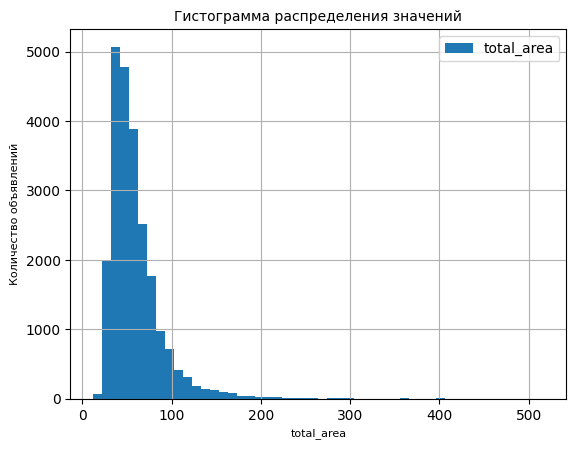

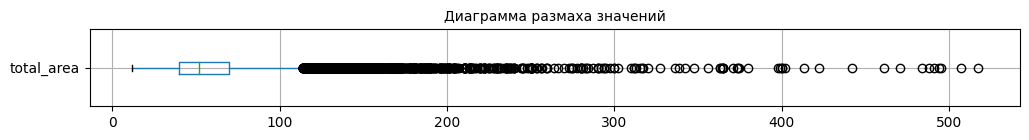


Статистические характеристики значений в столбце total_area :

count    23430.0
mean        60.0
std         33.0
min         12.0
25%         40.0
50%         52.0
75%         70.0
max        517.0
Name: total_area, dtype: float64

###################################################################################################################



<Figure size 1500x700 with 0 Axes>

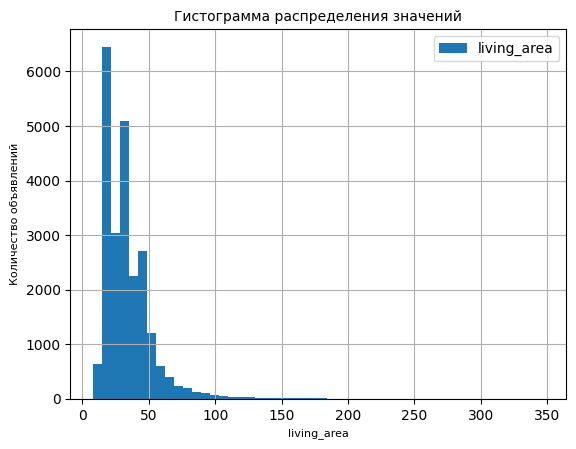

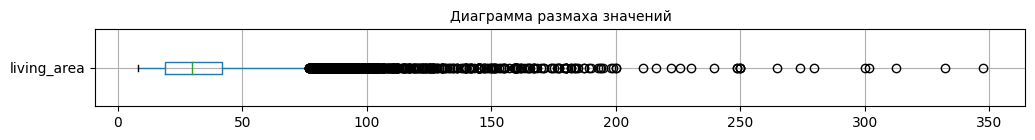


Статистические характеристики значений в столбце living_area :

count    23430.0
mean        34.0
std         20.0
min          8.0
25%         19.0
50%         30.0
75%         42.0
max        348.0
Name: living_area, dtype: float64

###################################################################################################################



<Figure size 1500x700 with 0 Axes>

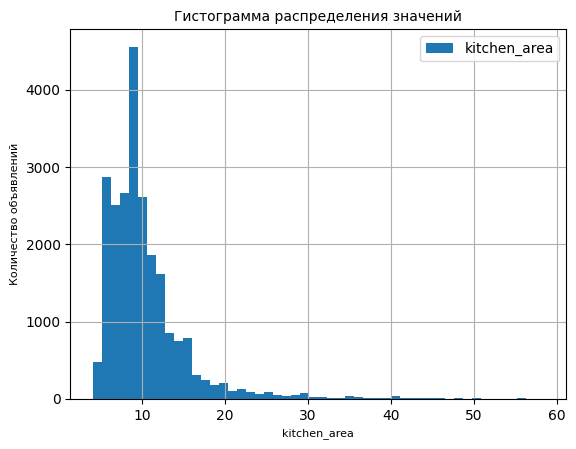

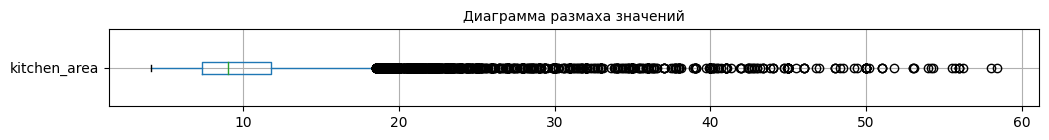


Статистические характеристики значений в столбце kitchen_area :

count    23430.0
mean        10.0
std          5.0
min          4.0
25%          7.0
50%          9.0
75%         12.0
max         58.0
Name: kitchen_area, dtype: float64

###################################################################################################################



<Figure size 1500x700 with 0 Axes>

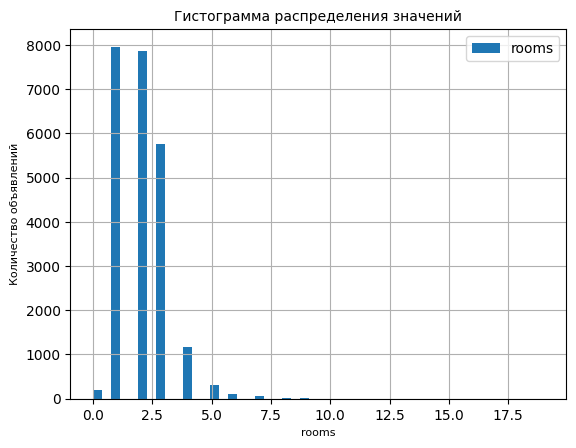

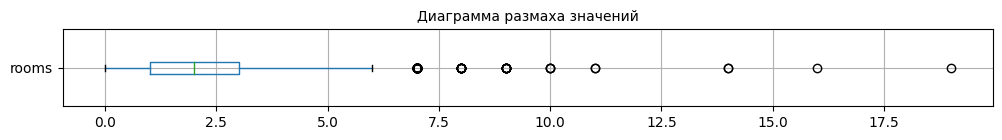


Статистические характеристики значений в столбце rooms :

count    23430.0
mean         2.0
std          1.0
min          0.0
25%          1.0
50%          2.0
75%          3.0
max         19.0
Name: rooms, dtype: float64

###################################################################################################################



<Figure size 1500x700 with 0 Axes>

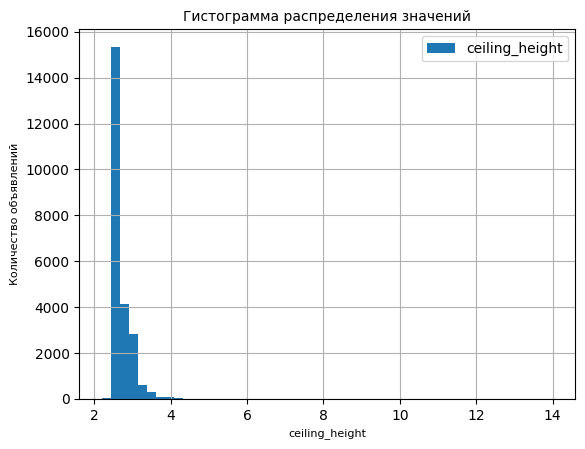

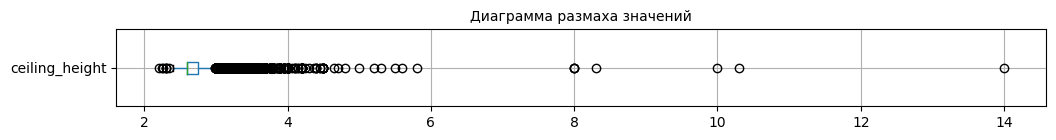


Статистические характеристики значений в столбце ceiling_height :

count    23430.0
mean         3.0
std          0.0
min          2.0
25%          3.0
50%          3.0
75%          3.0
max         14.0
Name: ceiling_height, dtype: float64

###################################################################################################################



<Figure size 1500x700 with 0 Axes>

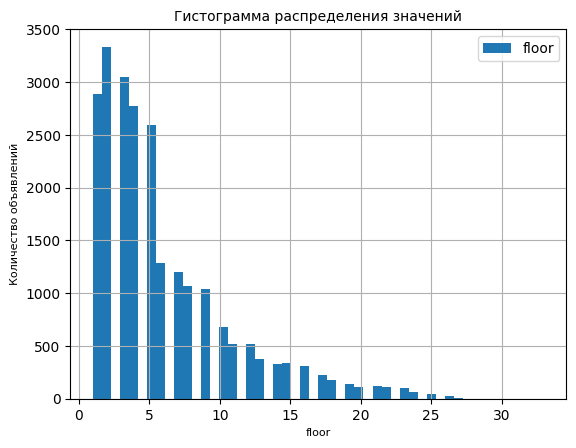

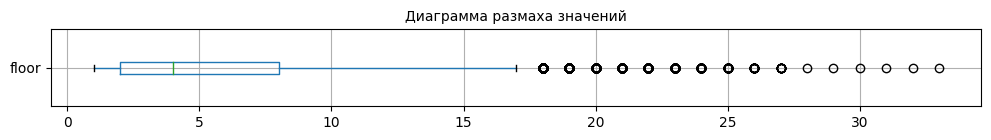


Статистические характеристики значений в столбце floor :

count    23430.0
mean         6.0
std          5.0
min          1.0
25%          2.0
50%          4.0
75%          8.0
max         33.0
Name: floor, dtype: float64

###################################################################################################################



<Figure size 1500x700 with 0 Axes>

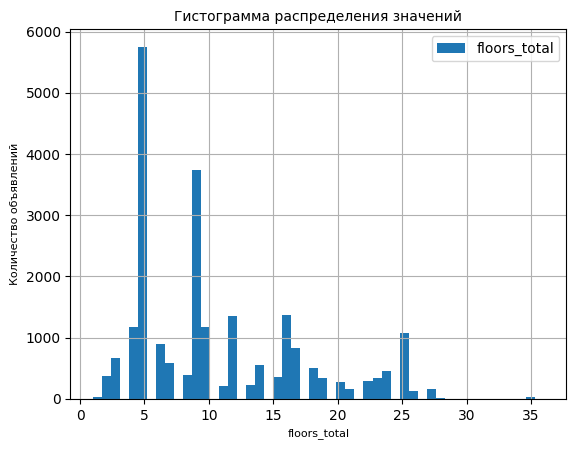

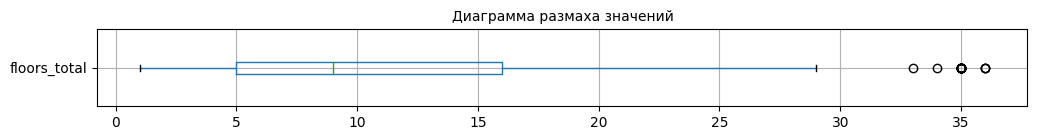


Статистические характеристики значений в столбце floors_total :

count    23430.0
mean        11.0
std          7.0
min          1.0
25%          5.0
50%          9.0
75%         16.0
max         36.0
Name: floors_total, dtype: float64

###################################################################################################################



<Figure size 1500x700 with 0 Axes>

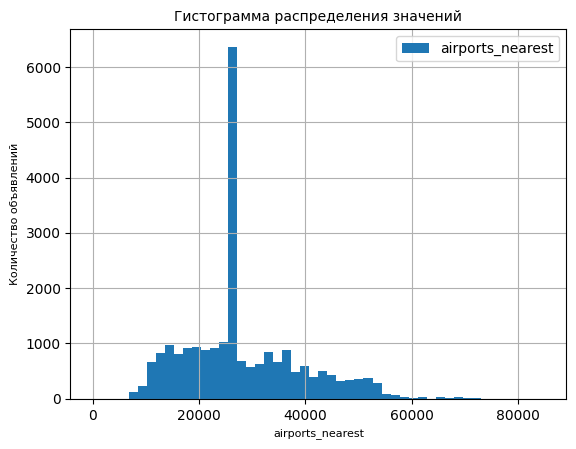

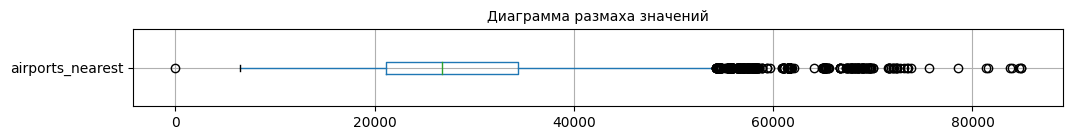


Статистические характеристики значений в столбце airports_nearest :

count    23430.0
mean     28319.0
std      11092.0
min          0.0
25%      21139.0
50%      26726.0
75%      34388.0
max      84869.0
Name: airports_nearest, dtype: float64

###################################################################################################################



<Figure size 1500x700 with 0 Axes>

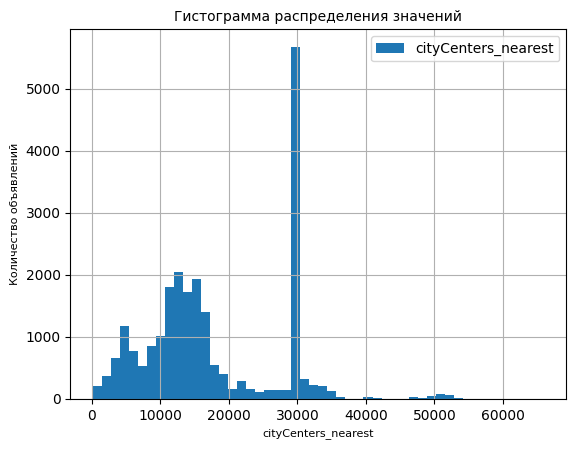

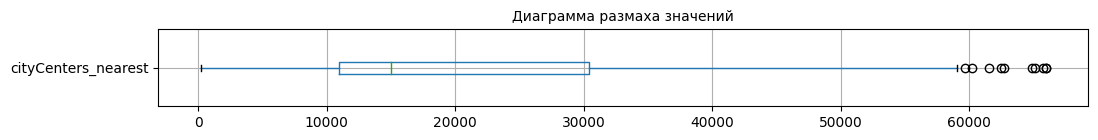


Статистические характеристики значений в столбце cityCenters_nearest :

count    23430.0
mean     17950.0
std      10157.0
min        181.0
25%      10960.0
50%      14975.0
75%      30375.0
max      65968.0
Name: cityCenters_nearest, dtype: float64

###################################################################################################################



<Figure size 1500x700 with 0 Axes>

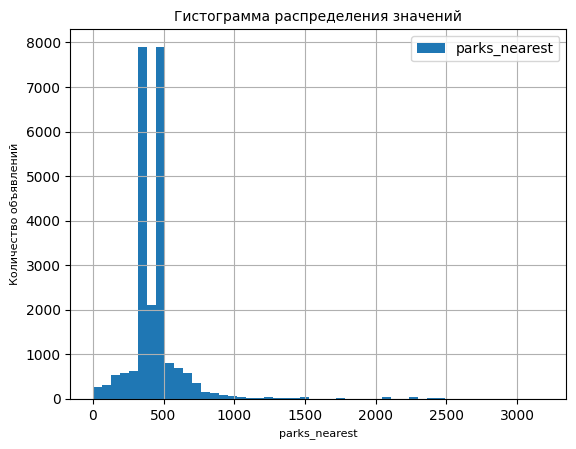

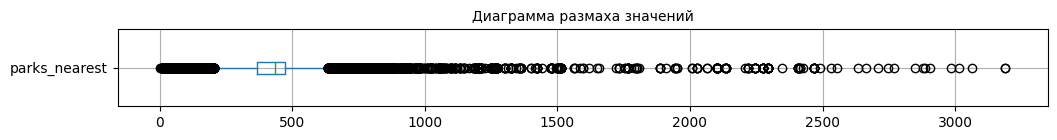


Статистические характеристики значений в столбце parks_nearest :

count    23430.0
mean       445.0
std        206.0
min          1.0
25%        367.0
50%        434.0
75%        474.0
max       3190.0
Name: parks_nearest, dtype: float64

###################################################################################################################



<Figure size 1500x700 with 0 Axes>

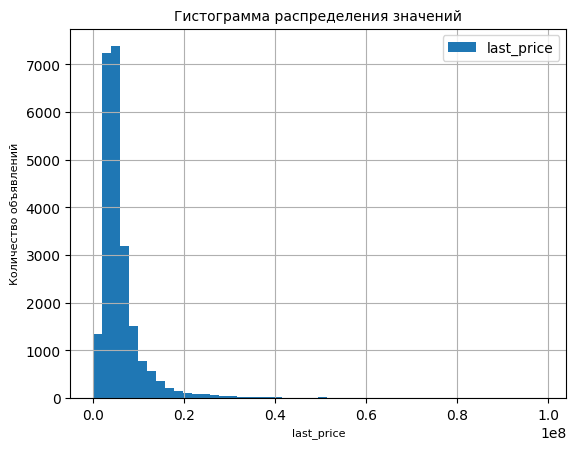

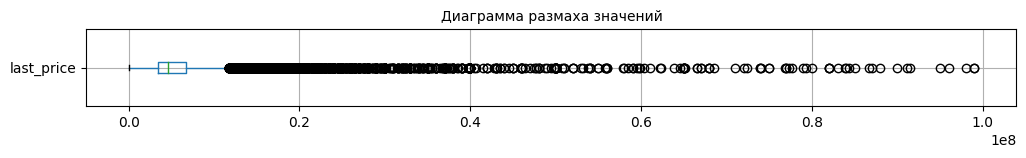


Статистические характеристики значений в столбце last_price :

count       23430.0
mean      6219982.0
std       6272262.0
min         12190.0
25%       3420000.0
50%       4638000.0
75%       6750000.0
max      99000000.0
Name: last_price, dtype: float64

###################################################################################################################



<Figure size 1500x700 with 0 Axes>

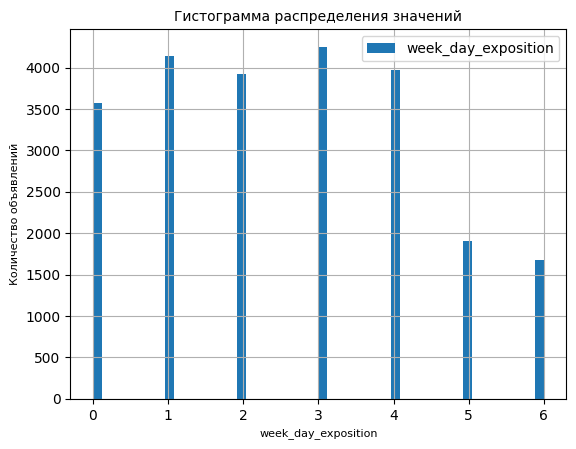

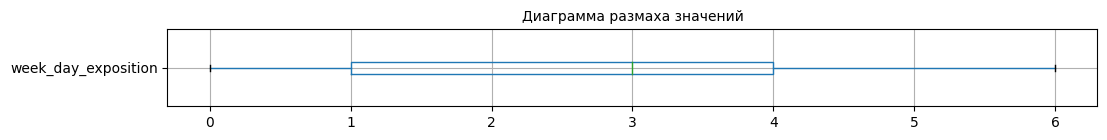


Статистические характеристики значений в столбце week_day_exposition :

count    23430.0
mean         3.0
std          2.0
min          0.0
25%          1.0
50%          3.0
75%          4.0
max          6.0
Name: week_day_exposition, dtype: float64

###################################################################################################################



<Figure size 1500x700 with 0 Axes>

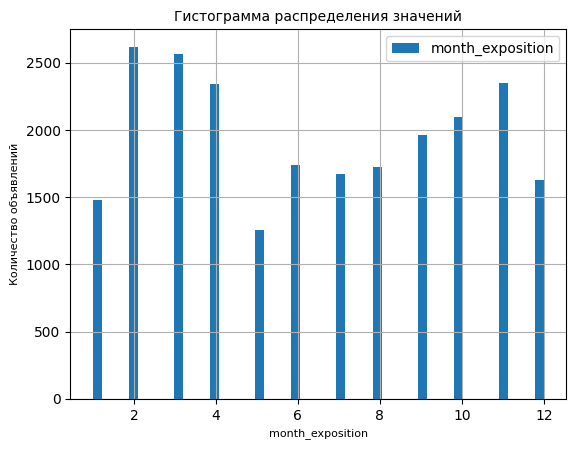

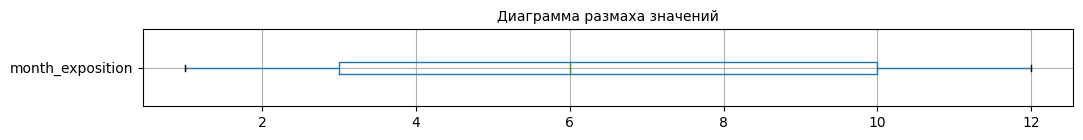


Статистические характеристики значений в столбце month_exposition :

count    23430.0
mean         6.0
std          3.0
min          1.0
25%          3.0
50%          6.0
75%         10.0
max         12.0
Name: month_exposition, dtype: float64

###################################################################################################################



In [44]:
# Напишем цикл для постраения гистограмм

columns_list = ['total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height', 'floor',\
                 'floors_total', 'airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'last_price',\
               'week_day_exposition', 'month_exposition']

for col in columns_list:
    plt.figure(figsize=(15,7))
    data[[col]].plot(kind='hist', bins=50, grid=True,  label=col)
    plt.title('Гистограмма распределения значений', size=10)
    plt.xlabel(col, size=8)
    plt.ylabel('Количество объявлений', size=8)
    plt.show()
    
    plt.figure(figsize=(12,1))
    data.boxplot(col, vert=False)
    plt.title('Диаграмма размаха значений', size=10)
    plt.show()
    
    print()
    print('Статистические характеристики значений в столбце', col,':')
    print()
    print(data[col].describe().round())
    print()
    print('###################################################################################################################')
    print()

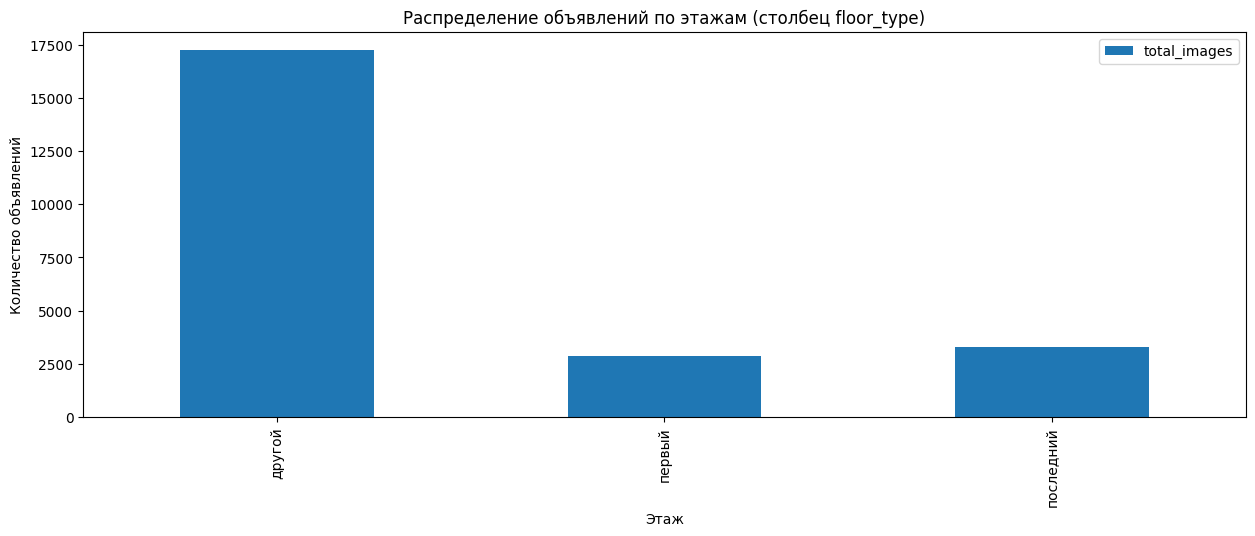

In [45]:
# Построим распределение для типов этажа квартиры («первый», «последний», «другой»)

data.pivot_table(index='floor_type', values='total_images', aggfunc='count').\
plot(kind='bar', figsize=(15,5))
plt.title('Распределение объявлений по этажам (столбец floor_type)')
plt.xlabel('Этаж')
plt.ylabel('Количество объявлений')
plt.show()

#### 4.2. Исследование количества дней для продажи квартиры.

Необходимо изучить, как быстро продавались квартиры. Данные с столбце days_exposition показывают, сколько дней было размещено каждое объявление. Построим гистограмму и рассчитаем среднее и медиану.


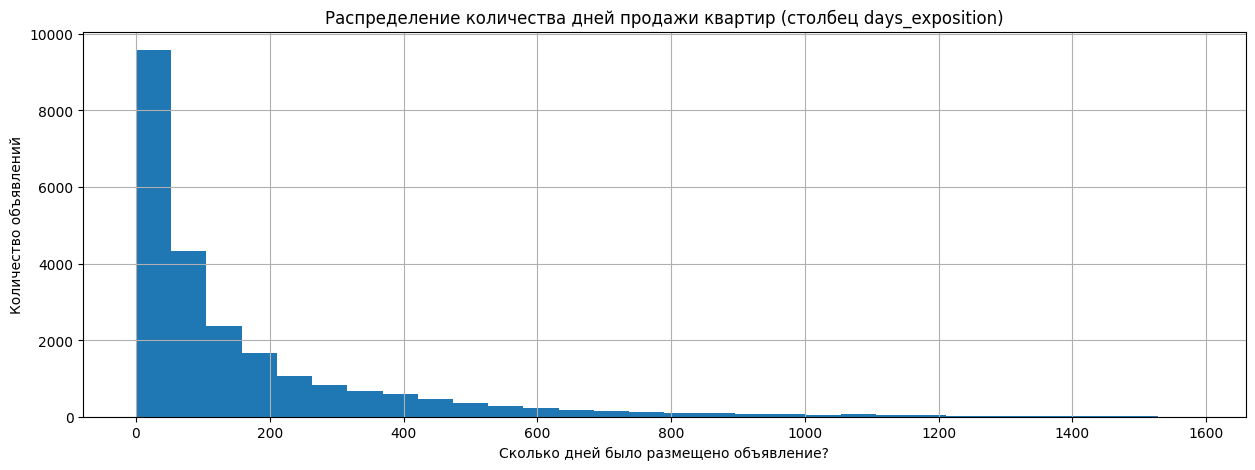

In [46]:
data['days_exposition'].plot(kind='hist', bins=30, grid=True, figsize=(15,5), label='days_exposition')
plt.title('Распределение количества дней продажи квартир (столбец days_exposition)')
plt.xlabel('Сколько дней было размещено объявление?')
plt.ylabel('Количество объявлений')
plt.show()

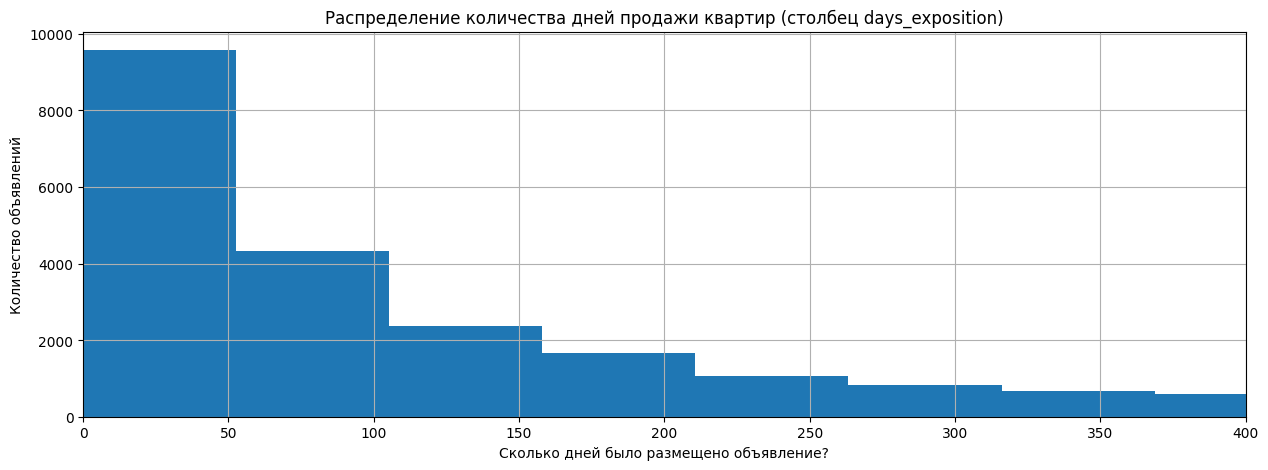

In [47]:
# Увеличим график на значениях от 0 до 400 дней

data['days_exposition'].plot(kind='hist', bins=30, grid=True,figsize=(15,5), label='days_exposition', xlim=(0, 400))   
plt.title('Распределение количества дней продажи квартир (столбец days_exposition)')
plt.xlabel('Сколько дней было размещено объявление?')
plt.ylabel('Количество объявлений')
plt.show()

In [48]:
data['days_exposition'].describe().T

count    23430.000000
mean       156.301494
std        213.491553
min          0.000000
25%         22.000000
50%         73.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [49]:
data['days_exposition'].value_counts()

0       3156
45       874
60       538
7        231
30       208
        ... 
1080       1
1064       1
1032       1
1016       1
1391       1
Name: days_exposition, Length: 1139, dtype: int64

In [50]:
print('Среднее значение параметра days_exposition:', data['days_exposition'].mean())
print('Медианное значение параметра days_exposition:', data['days_exposition'].median())

Среднее значение параметра days_exposition: 156.30149381135297
Медианное значение параметра days_exposition: 73.0


**ВЫВОД:**

- Медианное время продажи 73 дня.
- Хорошая быстрая продажа длится от 1 до 3 месяцев (порядка 100 дней на графике).
- Среднее нормальное время продажи квартиры - от 3 до 7-8 месяцев (75% = 198 дней).
- Всё, что дольше этого срока - долгие продажи. Очевидно, чтобы они когда-нибудь состоялись, необходимо пересмотреть подход продавца к сделке (снизить цену, откорректировать объявление).

Всё, что больше 600 дней - выброс, который можно отсечь.

На гистограмме наблюдается пик значений около нуля. 
Это связано с тем, что 1) изначально в данных было много нулевых значений - порядка 13%; 2) пропущенные значения были заменены нулями - порядка 13% значений.

#### 4.3. Исследование факторов, влияющих на полную стоимость квартиры.

Необходимо изучить, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Построим графики, которые покажут зависимость цены от указанных выше параметров.

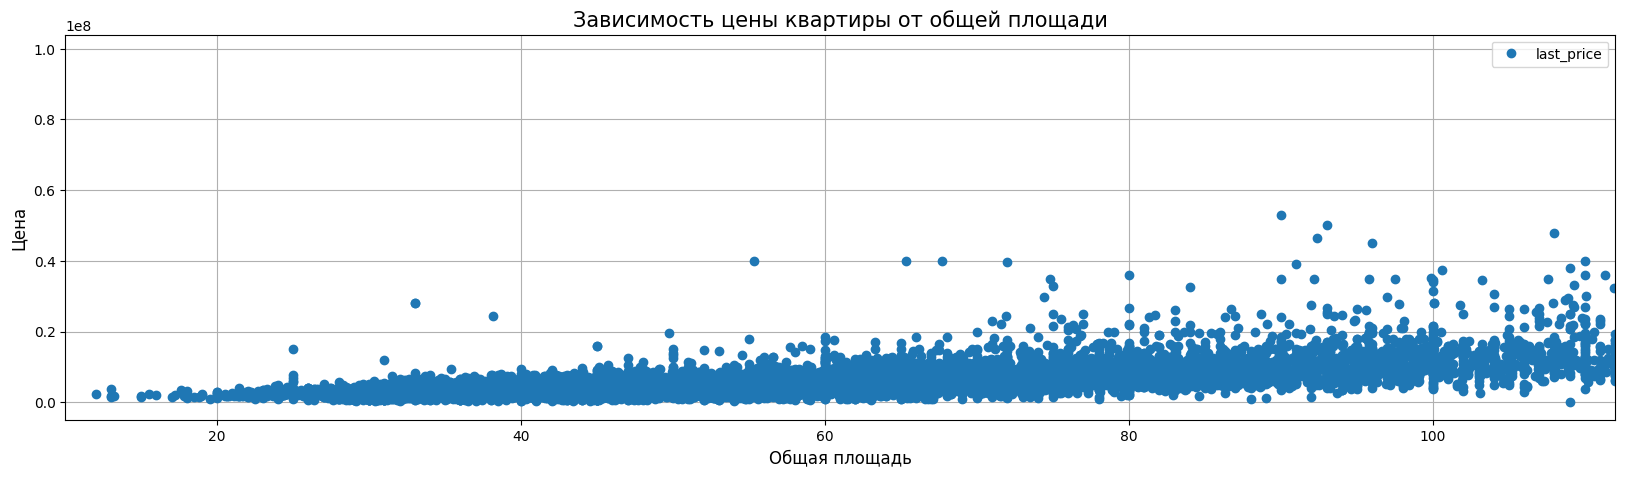

In [51]:
data.plot(x='total_area', y='last_price', style='o', xlim=(10, 112), grid=True, figsize=(20,5))
plt.title('Зависимость цены квартиры от общей площади', size=15)
plt.xlabel('Общая площадь', size=12)
plt.ylabel('Цена', size=12)
plt.show()

**ВЫВОД:** На графике видно, что существует явная линейная зависимость цены от общей площади квартиры: с увеличением общей площади цена возрастает.

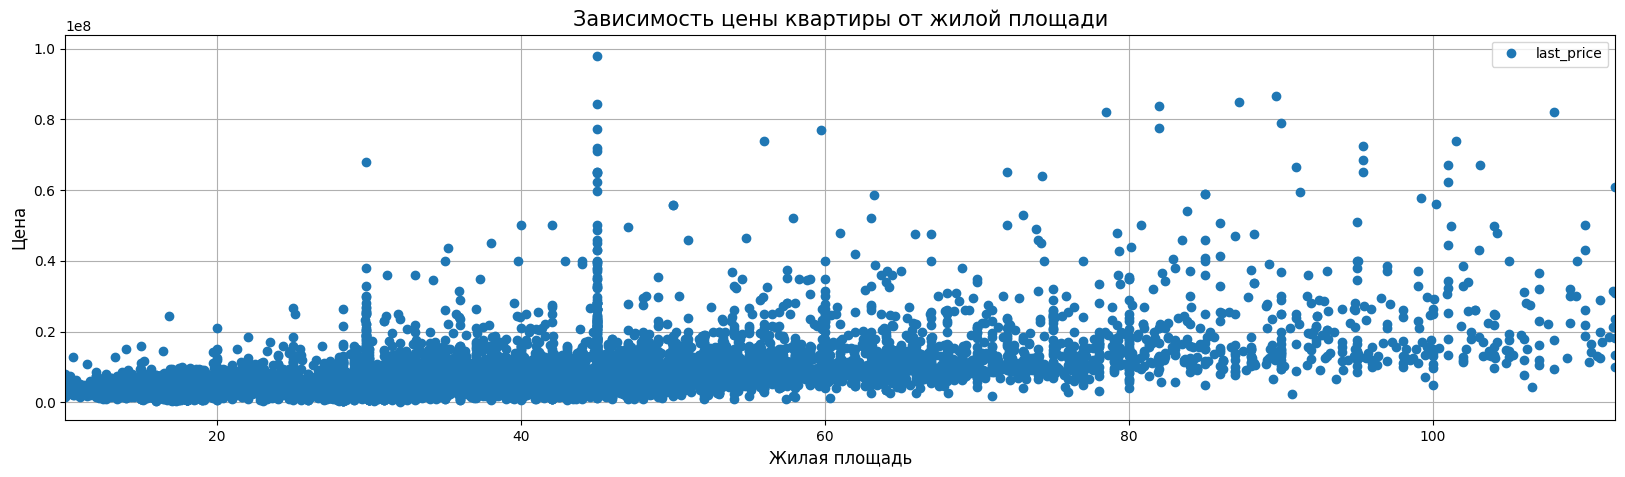

In [52]:
data.plot(x='living_area', y='last_price', style='o', xlim=(10, 112), grid=True, figsize=(20,5))
plt.title('Зависимость цены квартиры от жилой площади', size=15)
plt.xlabel('Жилая площадь', size=12)
plt.ylabel('Цена', size=12)
plt.show()

**ВЫВОД:** Линейная зависимость цены от жилой площади квартиры прослеживается, однако она не такая явная как в случае с общей площадью.

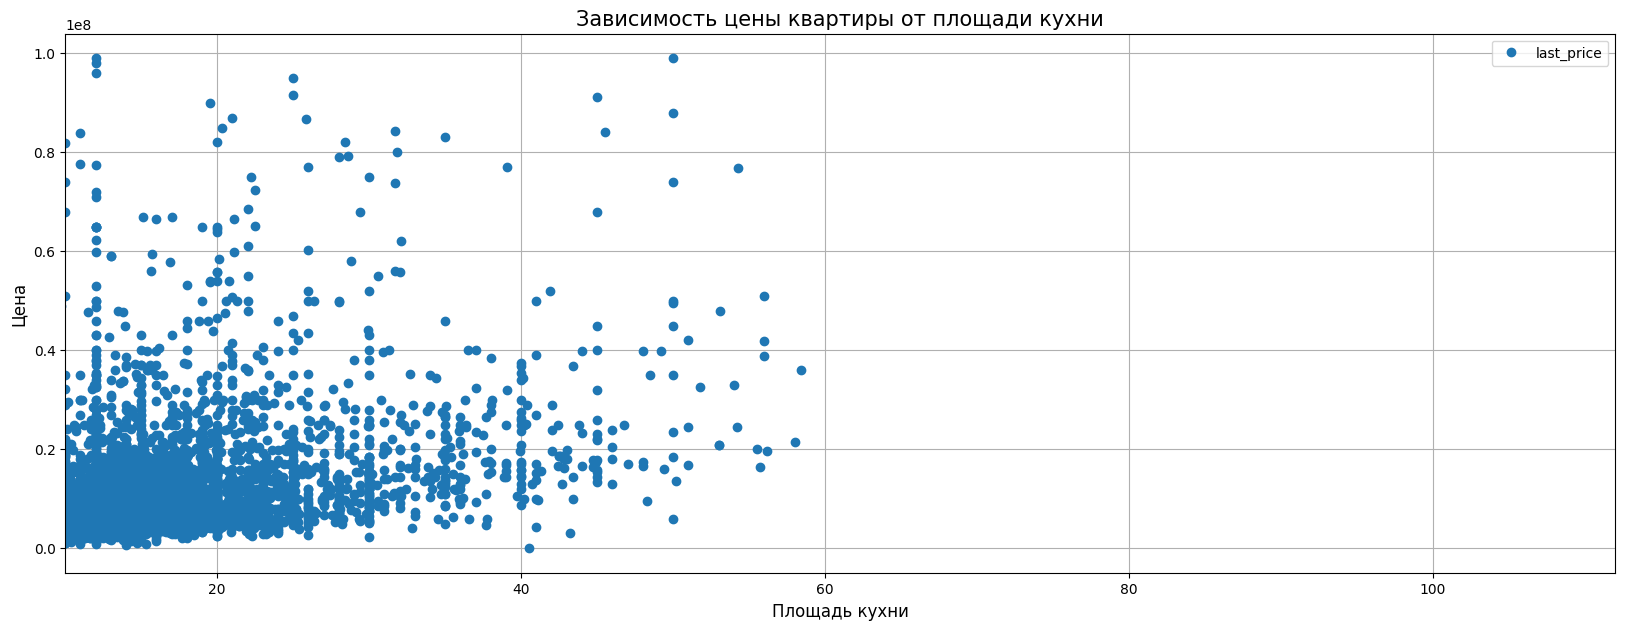

In [53]:
data.plot(x='kitchen_area', y='last_price', style='o', xlim=(10, 112), grid=True, figsize=(20,7))
plt.title('Зависимость цены квартиры от площади кухни', size=15)
plt.xlabel('Площадь кухни', size=12)
plt.ylabel('Цена', size=12)
plt.show()

**ВЫВОД:** Зависисмость стоимости квартиры от площади кухни не прослеживается.

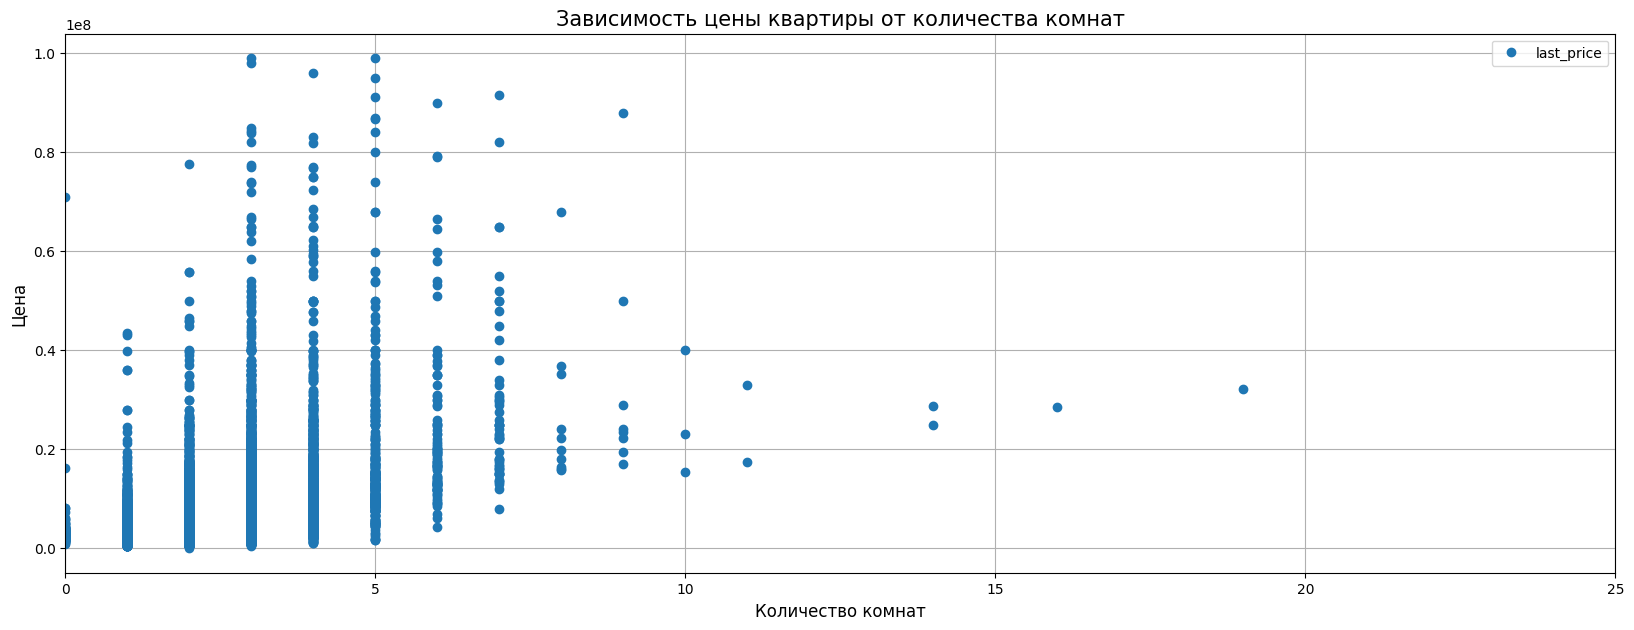

In [54]:
data.plot(x='rooms', y='last_price', style='o', xlim=(0, 25), grid=True, figsize=(20,7))
plt.title('Зависимость цены квартиры от количества комнат', size=15)
plt.xlabel('Количество комнат', size=12)
plt.ylabel('Цена', size=12)
plt.show()

**ВЫВОД:** Зависисмость стоимости квартиры от количества комнат прослеживается неявно.

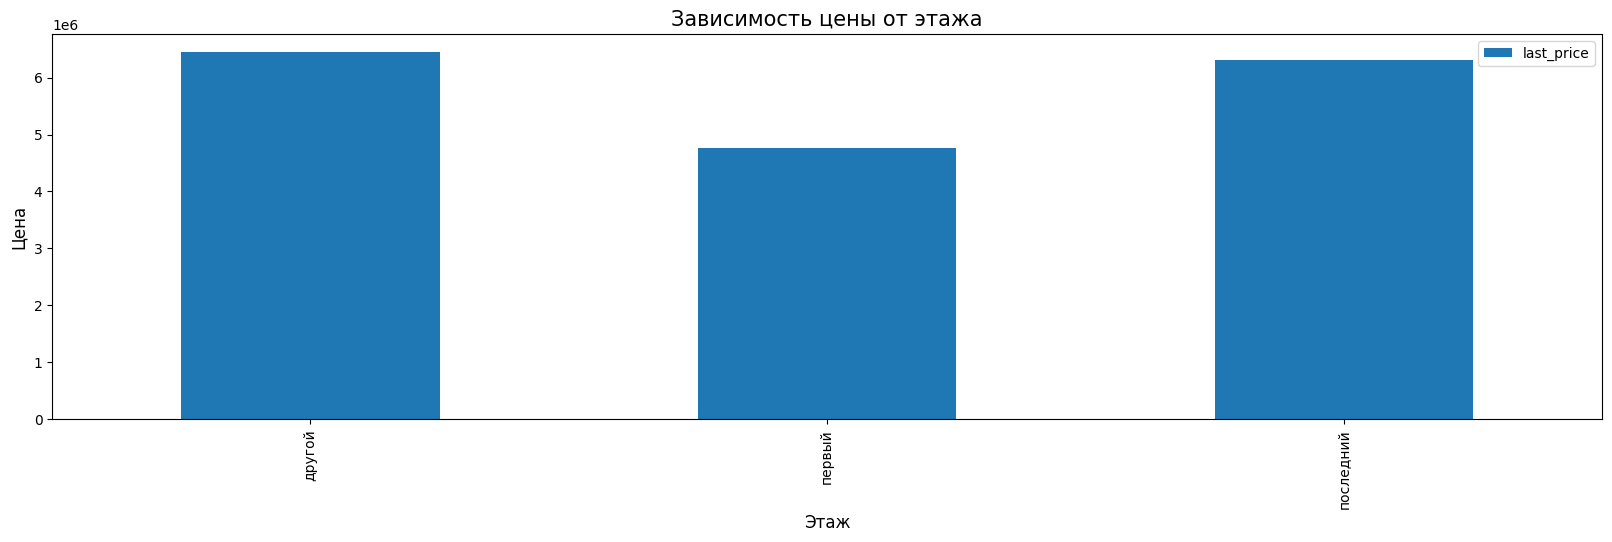

In [55]:
data.pivot_table(index='floor_type', values='last_price').plot(y='last_price', kind='bar', figsize=(20,5))
plt.title('Зависимость цены от этажа', size=15)
plt.xlabel('Этаж', size=12)
plt.ylabel('Цена', size=12)
plt.show()

**ВЫВОД:** Квартиры, расположенные на первых этажах дешевле остальных вариантов. Квартиры на последних этажах немного дешевле по отношению к промежуточным этажам (не первый и не последний).

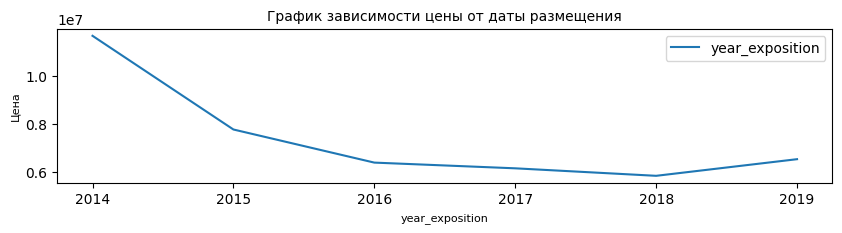

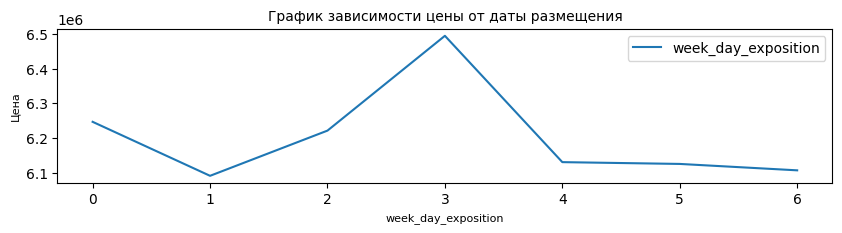

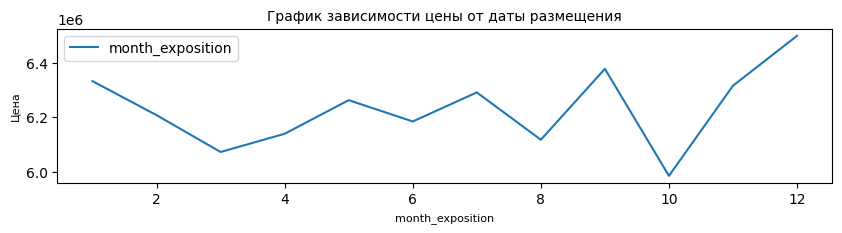

In [56]:
# Для графиков зависимости цены от даты размещения (день недели, месяц, год) напишем цикл

expo_list = ['year_exposition', 'week_day_exposition', 'month_exposition']

for col in expo_list:
    data.pivot_table(index=col, values='last_price').plot(y='last_price', label=col, figsize=(10,2))
    plt.title('График зависимости цены от даты размещения', size=10)
    plt.xlabel(col, size=8)
    plt.ylabel('Цена', size=8)
    plt.show()
    print()

**ВЫВОД:**

Судя по графкам, всё вполне ожидаемо:


1. Цена возрастает с увеличением площади. 


2. Цена возрастает с увеличением жилой площади, а вот площадь кухни влияет на цену в гораздо меньшей степени.

3. С зависимостью цены от количества комнат всё не так очевидно. При возрастании количества комнат от 1 до 3-х цена также возрастает, далее для 4-х, 5-ти и 6-тикомнатных квартир начинает снижаться. Возможно, дело тут в удаленности от центра: можно предположить, что эти 4-х и 5-тикомнатные варианты в общей массе находятся на окраине или в области, где недвижимость закономерно дешевле. Либо речь идет о многокомнатных бывших коммуналках из старого фонда, которые требуют существенных вложений в ремонт, и поэтому продаются несколько дешевле.

4. Квартиры на первом этаже - самые недорогие. Последний этаж - дороже первого, но дешевле других этажей. Очевидно, люди больше ценят этажи посередине, предпочитая избегать первых и последних - поэтому спрос, а соответственно и цены на них ниже.

5. Анализ зависимости цены от даты размещения позволяет отметить следующие закономерности: 

   - По графику зависимости цены от года можно сделать вывод, что в 2015-м рынок недвижимости в СПб и области довольно серьезно просел (цены в среднем снизились на 25%), и находился в таком состоянии до 2019г, когда снова наблюдается тенденция к повышению средней цены на рынке.
   - В объявлениях, размещенных в рабочие дни, цены выше, чем в выходные.
   - В целом, осенне-зимние объявления несколько дороже, чем размещенные весной-летом. При этом для объявлений, размещенных в октябре, наблыдается резкий спад цены. Эта особенность требует более детального изучения.
   

#### 4.4. Анализ десяти населённых пунктов с наибольшим числом объявлений, анализ стоимости квадратного метра.

Необходимо рассчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [57]:
# Найдем ТОП-10 населенных пунктов с наибольшим числом объявлений

data['pure_locality_name'].value_counts(ascending=False).head(10)

Санкт-Петербург    15548
Мурино               581
Кудрово              469
Шушары               438
Всеволожск           397
Пушкин               365
Колпино              338
Парголово            327
Гатчина              307
Выборг               234
Name: pure_locality_name, dtype: int64

In [58]:
# Выведем среднюю цену одного квадратного метра для ТОП-10

data.pivot_table(index='pure_locality_name', values='square_meter_price', aggfunc='mean').round().\
query('pure_locality_name in ["Санкт-Петербург", "Мурино", "Кудрово", "Шушары", "Всеволожск", "Пушкин",\
"Колпино", "Парголово", "Гатчина", "Выборг"]').sort_values(by='square_meter_price', ascending=False)

,square_meter_price
pure_locality_name,
Санкт-Петербург,113421.0
Пушкин,102880.0
Кудрово,95262.0
Парголово,90176.0
Мурино,85918.0
Шушары,78513.0
Колпино,75425.0
Гатчина,68746.0
Всеволожск,68719.0


**ВЫВОД:**

Самые дорогие квартиры в Санкт-Петербурге с ценой 113 421 за м2. Самые недорогие в первой 10-ке - это квартиры в Выборге, цена за 1м2 почти вдвое ниже, и составляет 58 286.

#### 4.5. Анализ изменения цены квадратного метра в Санкт-Петербурге для каждого километра по степени удалённости от центра.

Необходимо выделить квартиры в Санкт-Петербурге и вычислить среднюю цену каждого километра(столбец **cityCenters_nearest_km**). Построим сводную таблицу, описывающую, как стоимость объектов зависит от расстояния до центра города. 

In [59]:
price_per_km = data.query('pure_locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest_km',\
                                                    values='square_meter_price', aggfunc='mean').round()
display(price_per_km)

,square_meter_price
cityCenters_nearest_km,
0.0,219443.0
1.0,154628.0
2.0,147894.0
3.0,121539.0
4.0,127701.0
5.0,137166.0
6.0,144590.0
7.0,153449.0
8.0,124732.0


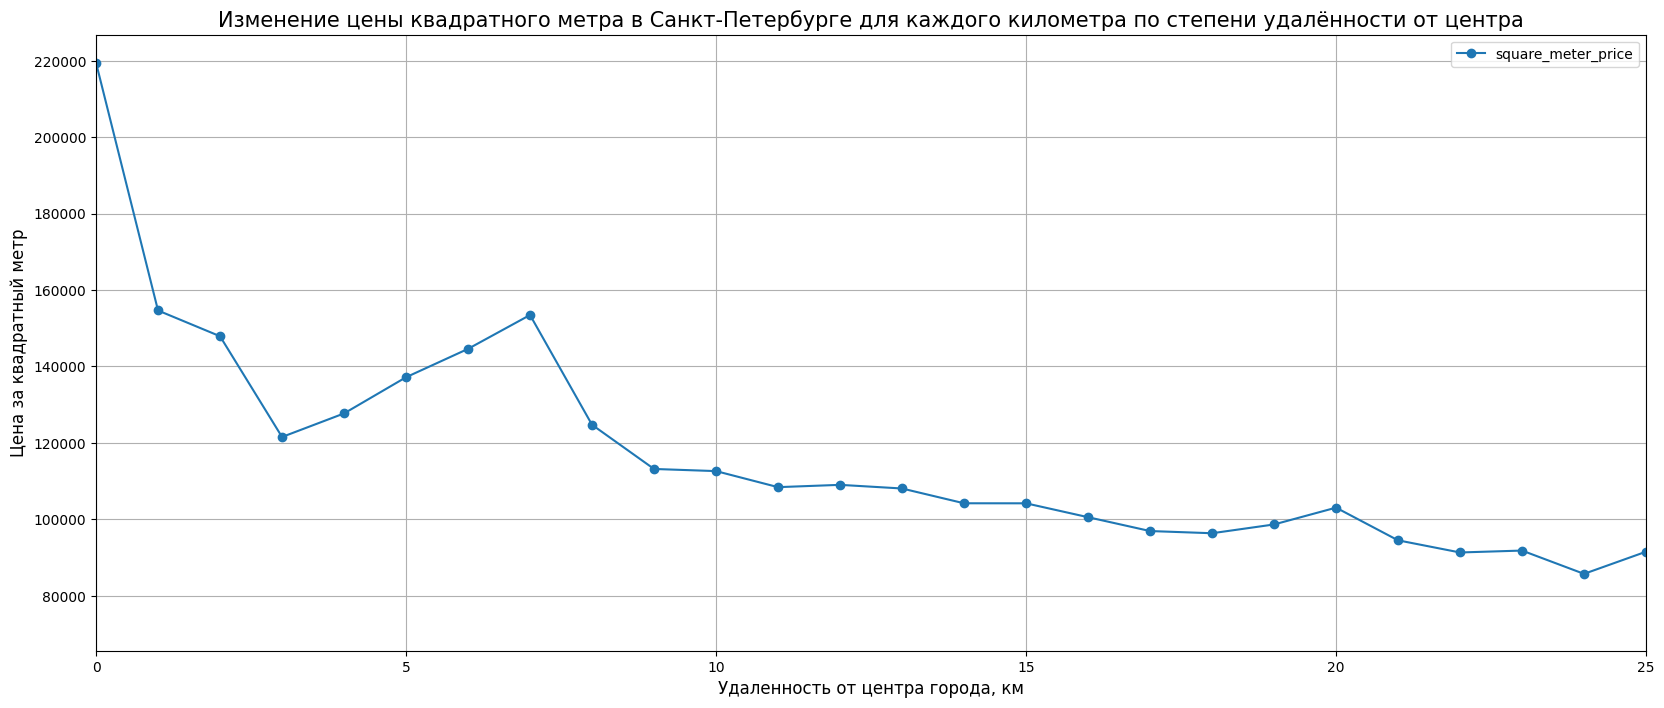

In [60]:
# Построим график по полученной сводной таблице

price_per_km.plot(y='square_meter_price', style='o-', xlim=(0, 25), grid=True, figsize=(20,8))

plt.title('Изменение цены квадратного метра в Санкт-Петербурге для каждого километра по степени удалённости от центра', size=15)
plt.xlabel('Удаленность от центра города, км', size=12)
plt.ylabel('Цена за квадратный метр', size=12)
plt.show()

**ВЫВОД:**

На графике видна довольно резкая разница в стоимости нулевого и первого километров. Далее, в точке 3-й км тренд на понижение цены резко меняется, и от 3-го до 7-го км цена идет вверх. После 7-го км цена также резко падает, и далее мы видим плавное снижение по мере удаления от центра города, с небольшим пиком в точке 20-й км.

Самые дорогие квартире находятся в самом центре, что вполне предсказуемо. Цены на расстоянии 1-2км находятся на одном уровне с 7-ым километром. 

### 5. Общий вывод.

Анализ данных сервиса Яндекс.Недвижимость позволил выявить определенные зависимости, на основании которых можно построить автоматизированную систему для отслеживания аномалий.

1. Цена возрастает с увеличением площади. 

2. Цена возрастает с увеличением жилой площади, а вот площадь кухни влияет на цену в гораздо меньшей степени.

3. С зависимостью цены от количества комнат всё не так очевидно. При возрастании количества комнат от 1 до 3-х цена также возрастает, далее для 4-х, 5-ти и 6-тикомнатных квартир начинает снижаться. Возможно, дело тут в удаленности от центра: можно предположить, что эти 4-х и 5-тикомнатные варианты в общей массе находятся на окраине или в области, где недвижимость закономерно дешевле. Либо речь идет о многокомнатных бывших коммуналках из старого фонда, которые требуют существенных вложений в ремонт, и поэтому продаются несколько дешевле.

4. Квартиры на первом этаже - самые недорогие. Последний этаж - дороже первого, но дешевле других этажей. Очевидно, люди больше ценят этажи посередине, предпочитая избегать первых и последних - поэтому спрос, а соответственно и цены на них ниже.

5. Зависимость цены от даты размещения не просматривается явно: не имеет значения, в какой день недели и в какой месяц года было размещено объявление - цены примерно одинаковые. По графику зависимости цены от года можно сделать вывод, что в 2015-м рынок недвижимости в СПб и области довольно серьезно просел (цены в среднем снизились на 25%), и находился в таком состоянии до 2019г, когда снова наблюдается тенденция к повышению средней цены на рынке.

6. Медианное время продажи 73 дня. Хорошая быстрая продажа длится от 1 до 3 месяцев. Среднее нормальное время продажи квартиры - от 3 до 7-8 месяцев. Всё, что дольше этого срока - долгие продажи. Очевидно, чтобы они когда-нибудь состоялись, необходимо пересмотреть подход продавца к сделке (снизить цену, откорректировать объявление).

7. Самые дорогие - это квартиры в Санкт-Петербурге с ценой 113 421 за м2. Самые недорогие в первой 10-ке - это квартиры в Выборге, цена за 1м2 почти вдвое ниже, и составляет 58 286.

8. Цена квадратного метра в Санкт-Петербурге для каждого километра снижается по мере удаления от центра, однако есть резкое повышение цены вопреки общему тренду в точке 7км, и небольшле повышение в точке 20 км.
